# Step 1

### # Importing the Database to My Jupyter Notebook

In [341]:
from sqlalchemy import create_engine
import pandas as pd

# Connection string
connection_string = "mysql+pymysql://root@localhost/classicmodels"
engine = create_engine(connection_string)

# Test connection and load data
with engine.connect() as connection:
    df = pd.read_sql("SELECT * FROM customers;", con=connection)
    print(df.head())

   customerNumber                customerName contactLastName  \
0             103           Atelier graphique         Schmitt   
1             112          Signal Gift Stores            King   
2             114  Australian Collectors, Co.        Ferguson   
3             119           La Rochelle Gifts         Labrune   
4             121          Baane Mini Imports      Bergulfsen   

  contactFirstName         phone                  addressLine1 addressLine2  \
0          Carine     40.32.2555                54, rue Royale         None   
1             Jean    7025551838               8489 Strong St.         None   
2            Peter  03 9520 4555             636 St Kilda Road      Level 3   
3          Janine     40.67.8555  67, rue des Cinquante Otages         None   
4           Jonas     07-98 9555        Erling Skakkes gate 78         None   

        city     state postalCode    country  salesRepEmployeeNumber  \
0     Nantes      None      44000     France                  

### Load the data that we need to into dataframes

In [342]:
# Load tables into DataFrames
customers_df = pd.read_sql("SELECT * FROM customers;", con=engine)
orders_df = pd.read_sql("SELECT * FROM orders;", con=engine)
orderdetails_df = pd.read_sql("SELECT * FROM orderdetails;", con=engine)
products_df = pd.read_sql("SELECT * FROM products;", con=engine)
payments_df = pd.read_sql("SELECT * FROM payments;", con=engine)

# Verify table structures
print(customers_df.head())
print(orders_df.head())


   customerNumber                customerName contactLastName  \
0             103           Atelier graphique         Schmitt   
1             112          Signal Gift Stores            King   
2             114  Australian Collectors, Co.        Ferguson   
3             119           La Rochelle Gifts         Labrune   
4             121          Baane Mini Imports      Bergulfsen   

  contactFirstName         phone                  addressLine1 addressLine2  \
0          Carine     40.32.2555                54, rue Royale         None   
1             Jean    7025551838               8489 Strong St.         None   
2            Peter  03 9520 4555             636 St Kilda Road      Level 3   
3          Janine     40.67.8555  67, rue des Cinquante Otages         None   
4           Jonas     07-98 9555        Erling Skakkes gate 78         None   

        city     state postalCode    country  salesRepEmployeeNumber  \
0     Nantes      None      44000     France                  

### # Preprocessing which includes cleaning and removal of null rows because those won't be useful to us

In [343]:
# Check for missing values in each table
print(customers_df.isnull().sum())
print(orders_df.isnull().sum())
print(orderdetails_df.isnull().sum())

# Handle missing values
customers_df['state'].fillna('Unknown', inplace=True)  # Replace missing states with 'Unknown'
orders_df.dropna(subset=['shippedDate'], inplace=True)  # Drop rows where shippedDate is null


customerNumber              0
customerName                0
contactLastName             0
contactFirstName            0
phone                       0
addressLine1                0
addressLine2              100
city                        0
state                      73
postalCode                  7
country                     0
salesRepEmployeeNumber     22
creditLimit                 0
dtype: int64
orderNumber         0
orderDate           0
requiredDate        0
shippedDate        14
status              0
comments          246
customerNumber      0
dtype: int64
orderNumber        0
productCode        0
quantityOrdered    0
priceEach          0
orderLineNumber    0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18668\1721357936.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['state'].fillna('Unknown', inplace=True)  # Replace missing states with 'Unknown'


In [344]:
print(payments_df.columns)


Index(['customerNumber', 'checkNumber', 'paymentDate', 'amount'], dtype='object')


### More preprocessing including standardizing column names and date formats to remove chances of key errors 

In [345]:
# Strip spaces and standardize column names
customers_df.columns = customers_df.columns.str.strip().str.lower()
orders_df.columns = orders_df.columns.str.strip().str.lower()
orderdetails_df.columns = orderdetails_df.columns.str.strip().str.lower()

# Convert date columns to datetime
orders_df['orderdate'] = pd.to_datetime(orders_df['orderdate'])
payments_df['paymentDate'] = pd.to_datetime(payments_df['paymentDate'])


In [346]:
# Display column names
print("Customers columns:", customers_df.columns)
print("Orders columns:", orders_df.columns)
print("OrderDetails columns:", orderdetails_df.columns)
print("Products columns:", products_df.columns)


Customers columns: Index(['customernumber', 'customername', 'contactlastname', 'contactfirstname',
       'phone', 'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'salesrepemployeenumber', 'creditlimit'],
      dtype='object')
Orders columns: Index(['ordernumber', 'orderdate', 'requireddate', 'shippeddate', 'status',
       'comments', 'customernumber'],
      dtype='object')
OrderDetails columns: Index(['ordernumber', 'productcode', 'quantityordered', 'priceeach',
       'orderlinenumber'],
      dtype='object')
Products columns: Index(['productCode', 'productName', 'productLine', 'productScale',
       'productVendor', 'productDescription', 'quantityInStock', 'buyPrice',
       'MSRP'],
      dtype='object')


In [347]:
# Normalize column names across all DataFrames
customers_df.columns = customers_df.columns.str.lower()
orders_df.columns = orders_df.columns.str.lower()
orderdetails_df.columns = orderdetails_df.columns.str.lower()
products_df.columns = products_df.columns.str.lower()

# Check column names after standardization
print("Customers columns:", customers_df.columns)
print("Orders columns:", orders_df.columns)
print("OrderDetails columns:", orderdetails_df.columns)
print("Products columns:", products_df.columns)


Customers columns: Index(['customernumber', 'customername', 'contactlastname', 'contactfirstname',
       'phone', 'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'salesrepemployeenumber', 'creditlimit'],
      dtype='object')
Orders columns: Index(['ordernumber', 'orderdate', 'requireddate', 'shippeddate', 'status',
       'comments', 'customernumber'],
      dtype='object')
OrderDetails columns: Index(['ordernumber', 'productcode', 'quantityordered', 'priceeach',
       'orderlinenumber'],
      dtype='object')
Products columns: Index(['productcode', 'productname', 'productline', 'productscale',
       'productvendor', 'productdescription', 'quantityinstock', 'buyprice',
       'msrp'],
      dtype='object')


In [348]:
# Merge orders with customers
orders_customers = pd.merge(orders_df, customers_df, on='customernumber', how='inner')

# Merge with order details
orders_details = pd.merge(orders_customers, orderdetails_df, on='ordernumber', how='inner')

# Merge with products
full_data = pd.merge(orders_details, products_df, on='productcode', how='inner')

# Calculate revenue for each order line
full_data['revenue'] = full_data['quantityordered'] * full_data['priceeach']


In [349]:
print(full_data.head())


   ordernumber  orderdate requireddate shippeddate   status  \
0        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
1        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
2        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
3        10100 2003-01-06   2003-01-13  2003-01-10  Shipped   
4        10101 2003-01-09   2003-01-18  2003-01-11  Shipped   

                 comments  customernumber                  customername  \
0                    None             363  Online Diecast Creations Co.   
1                    None             363  Online Diecast Creations Co.   
2                    None             363  Online Diecast Creations Co.   
3                    None             363  Online Diecast Creations Co.   
4  Check on availability.             128          Blauer See Auto, Co.   

  contactlastname contactfirstname  ... orderlinenumber  \
0           Young          Dorothy  ...               3   
1           Young          Dorothy  ...             

In [350]:
# Select relevant columns for analysis
analysis_df = full_data[['orderdate', 'revenue', 'productline', 'customername', 'city', 'country']]

# Preview the final dataset
print(analysis_df.head())


   orderdate  revenue   productline                  customername       city  \
0 2003-01-06  4080.00  Vintage Cars  Online Diecast Creations Co.     Nashua   
1 2003-01-06  2754.50  Vintage Cars  Online Diecast Creations Co.     Nashua   
2 2003-01-06  1660.12  Vintage Cars  Online Diecast Creations Co.     Nashua   
3 2003-01-06  1729.21  Vintage Cars  Online Diecast Creations Co.     Nashua   
4 2003-01-09  2701.50  Vintage Cars          Blauer See Auto, Co.  Frankfurt   

   country  
0      USA  
1      USA  
2      USA  
3      USA  
4  Germany  


In [351]:
# Check the structure of the dataset
print(analysis_df.info())

# Summary statistics for numerical columns
print(analysis_df.describe())

# Check for missing values
print(analysis_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderdate     2855 non-null   datetime64[ns]
 1   revenue       2855 non-null   float64       
 2   productline   2855 non-null   object        
 3   customername  2855 non-null   object        
 4   city          2855 non-null   object        
 5   country       2855 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 134.0+ KB
None
                           orderdate       revenue
count                           2855   2855.000000
mean   2004-05-05 06:07:41.506129664   3197.511888
min              2003-01-06 00:00:00    481.500000
25%              2003-11-07 00:00:00   1987.580000
50%              2004-06-03 00:00:00   2876.300000
75%              2004-11-17 00:00:00   4086.800000
max              2005-05-17 00:00:00  11503.140000
std     

# Step 4

In [352]:
# Group by country and sum revenue
country_revenue = analysis_df.groupby('country')['revenue'].sum().sort_values(ascending=False)

# Display top 5 countries by revenue
print("Top 5 Countries by Revenue:")
print(country_revenue.head())


Top 5 Countries by Revenue:
country
USA            3071784.86
Spain          1023013.43
France          965750.58
Australia       520331.08
New Zealand     439077.63
Name: revenue, dtype: float64


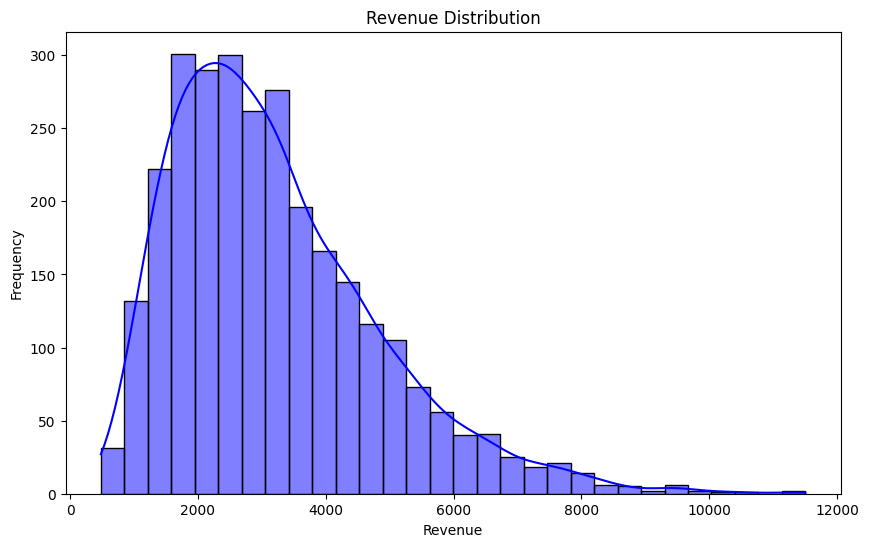

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of revenue
plt.figure(figsize=(10, 6))
sns.histplot(analysis_df['revenue'], bins=30, kde=True, color='blue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


In [354]:
# Calculate total revenue and total number of orders
total_revenue = analysis_df['revenue'].sum()
total_orders = analysis_df['orderdate'].nunique()  # Number of unique orders (based on order dates)

# Calculate average order size
average_order_size = total_revenue / total_orders
print(f"Average Order Size: {average_order_size:.2f}")


Average Order Size: 35659.75


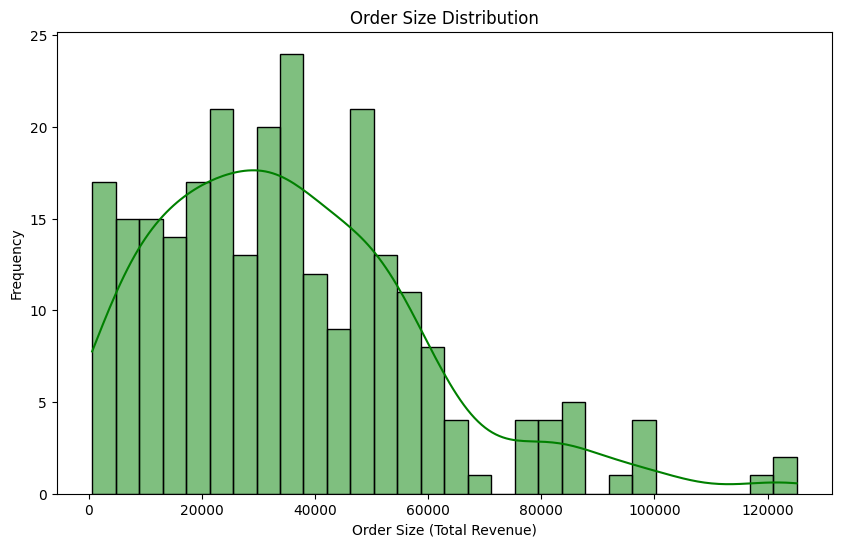

In [355]:
# Calculate total revenue per order (order size)
order_size = analysis_df.groupby('orderdate')['revenue'].sum()

# Plot a histogram for order size distribution
plt.figure(figsize=(10, 6))
sns.histplot(order_size, bins=30, kde=True, color='green')

# Add title and labels
plt.title('Order Size Distribution')
plt.xlabel('Order Size (Total Revenue)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


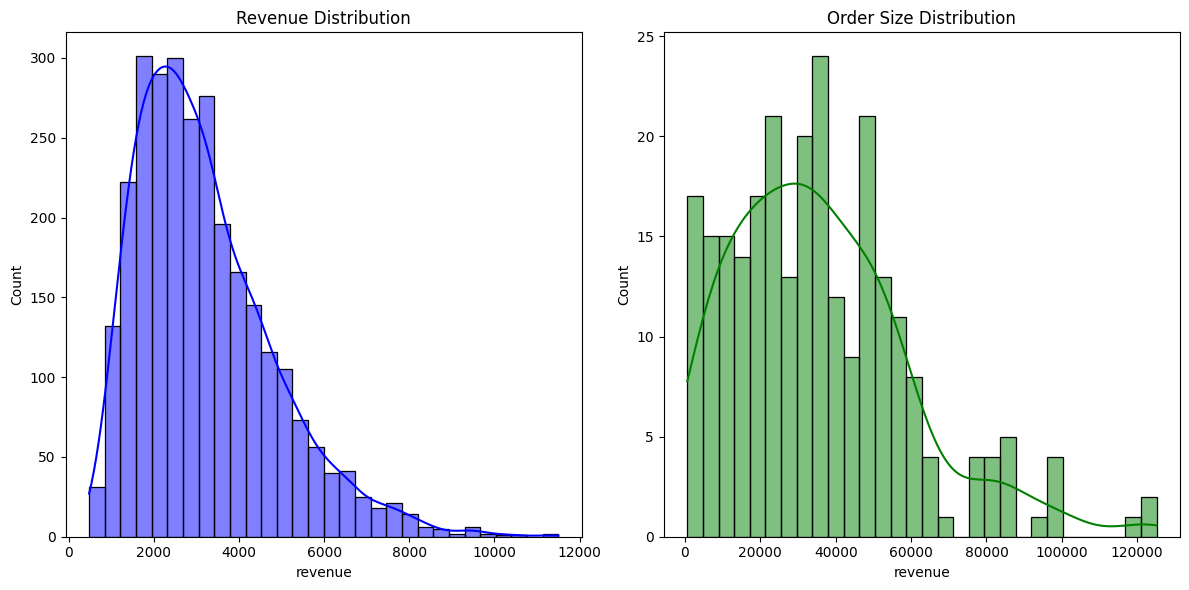

In [356]:
# Plot multiple histograms for revenue and order size on the same figure
plt.figure(figsize=(12, 6))

# Histogram for revenue
plt.subplot(1, 2, 1)
sns.histplot(analysis_df['revenue'], bins=30, kde=True, color='blue')
plt.title('Revenue Distribution')

# Histogram for order size
plt.subplot(1, 2, 2)
sns.histplot(order_size, bins=30, kde=True, color='green')
plt.title('Order Size Distribution')

plt.tight_layout()
plt.show()


In [357]:
# Calculate total revenue and total unique customers
total_customers = analysis_df['customername'].nunique()

# Calculate average customer spend
average_customer_spend = total_revenue / total_customers
print(f"Average Customer Spend: {average_customer_spend:.2f}")


Average Customer Spend: 93152.00


In [358]:
# Group by product line and sum revenue
productline_revenue = analysis_df.groupby('productline')['revenue'].sum().sort_values(ascending=False)

# Display revenue by product line
print("Revenue by Product Line:")
print(productline_revenue)


Revenue by Product Line:
productline
Classic Cars        3716003.88
Vintage Cars        1677622.41
Motorcycles         1117412.53
Trucks and Buses     968566.87
Planes               885859.92
Ships                588400.06
Trains               175030.77
Name: revenue, dtype: float64


In [359]:
# Group by customer and sum revenue
top_customers = analysis_df.groupby('customername')['revenue'].sum().sort_values(ascending=False).head(10)

# Display top 10 customers
print("Top 10 Customers by Revenue:")
print(top_customers)


Top 10 Customers by Revenue:
customername
Euro+ Shopping Channel          744313.88
Mini Gifts Distributors Ltd.    584188.24
Australian Collectors, Co.      180585.07
Muscle Machine Inc              177913.95
Dragon Souveniers, Ltd.         156251.03
Down Under Souveniers, Inc      154622.08
AV Stores, Co.                  148410.09
Salzburg Collectables           137480.07
Kelly's Gift Shop               137460.79
Anna's Decorations, Ltd         137034.22
Name: revenue, dtype: float64


In [360]:
# Group by country and sum revenue
top_countries = analysis_df.groupby('country')['revenue'].sum().sort_values(ascending=False).head(10)

# Display top 10 countries by revenue
print("Top 10 Countries by Revenue:")
print(top_countries)


Top 10 Countries by Revenue:
country
USA            3071784.86
Spain          1023013.43
France          965750.58
Australia       520331.08
New Zealand     439077.63
UK              436947.44
Italy           360616.81
Finland         295149.35
Singapore       263997.78
Denmark         218994.92
Name: revenue, dtype: float64


In [361]:
# Revenue by city
city_revenue = analysis_df.groupby('city')['revenue'].sum().sort_values(ascending=False)

# Display top 5 cities by revenue
print("Top 5 Cities by Revenue:")
print(city_revenue.head())


Top 5 Cities by Revenue:
city
Madrid        903505.11
San Rafael    584188.24
NYC           456496.29
Auckland      292082.87
Singapore     263997.78
Name: revenue, dtype: float64


# Step 5

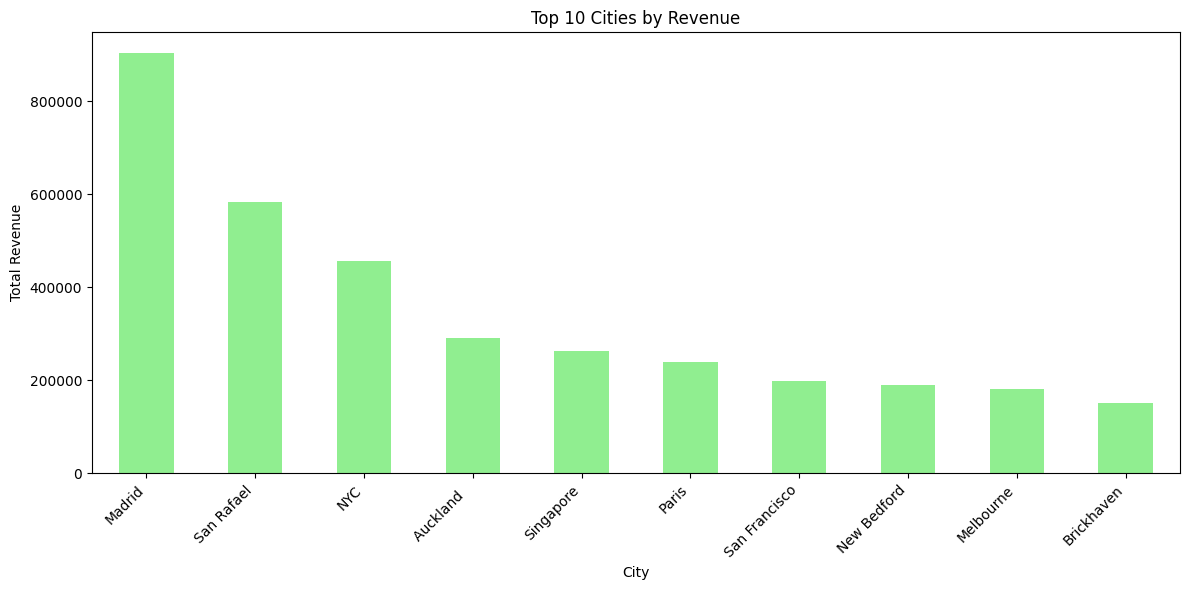

In [362]:
# Select top 5 cities by revenue
top_10_cities = city_revenue.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar', color='lightgreen')

# Add title and labels
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability

# Show the plot
plt.tight_layout()
plt.savefig('Top_10_Cities.png')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18668\1014316448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['month'] = analysis_df['orderdate'].dt.to_period('M')


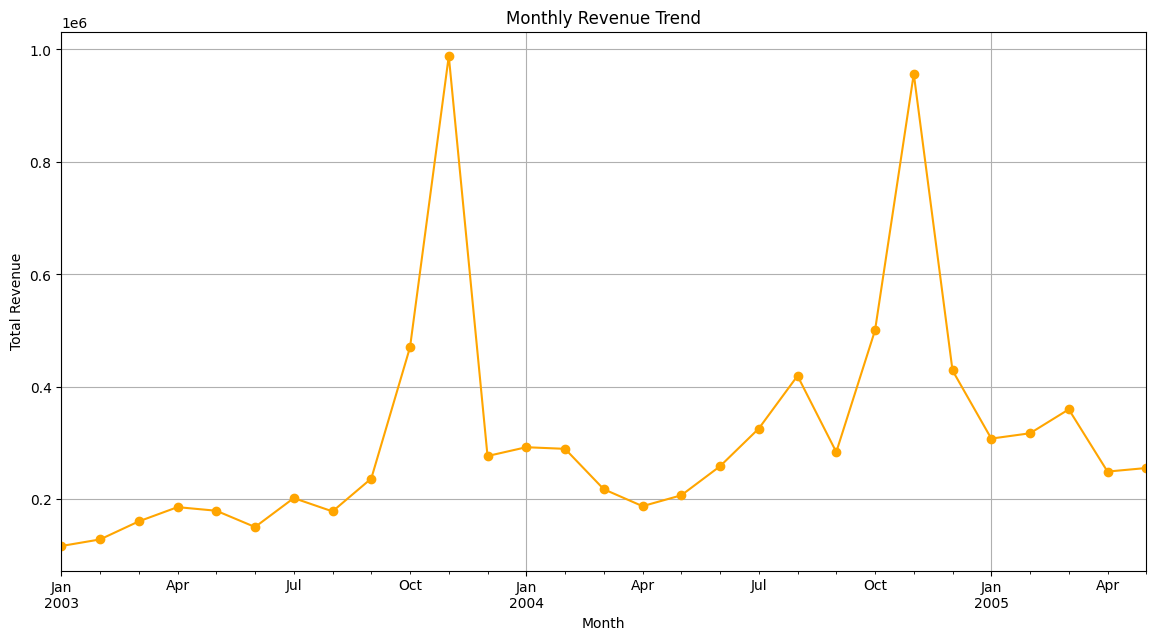

In [363]:
# Add a year-month column for grouping
analysis_df['month'] = analysis_df['orderdate'].dt.to_period('M')

# Group by month and sum revenue
monthly_revenue = analysis_df.groupby('month')['revenue'].sum()

# Line plot of monthly revenue
plt.figure(figsize=(14, 7))
monthly_revenue.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.savefig('Monthly_trend.png')

plt.show()


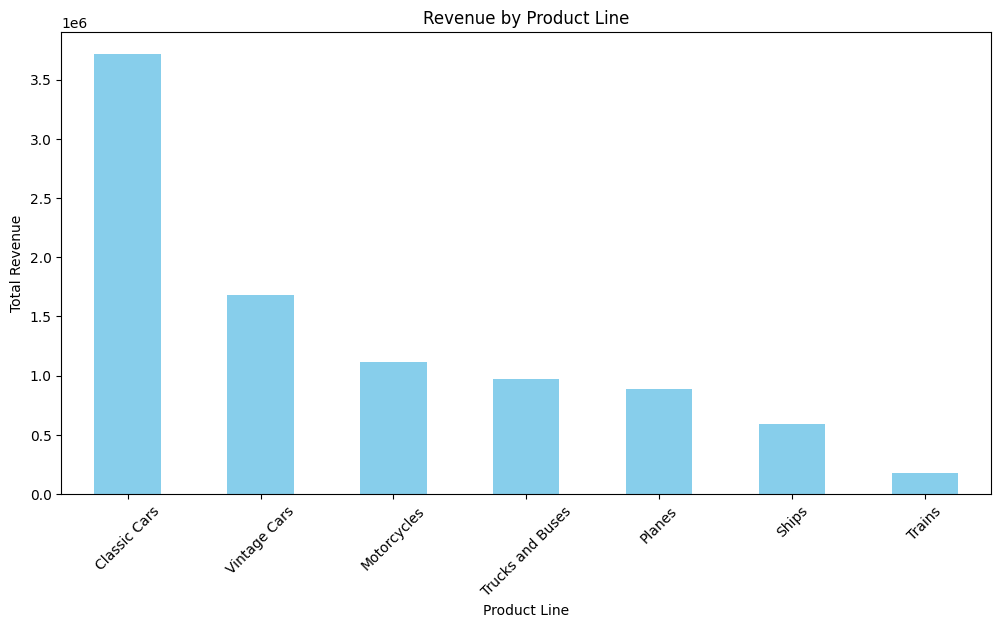

In [364]:
# Bar chart for revenue by product line
productline_revenue.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Revenue by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.savefig('revenue_by_product_line.png')
plt.show()


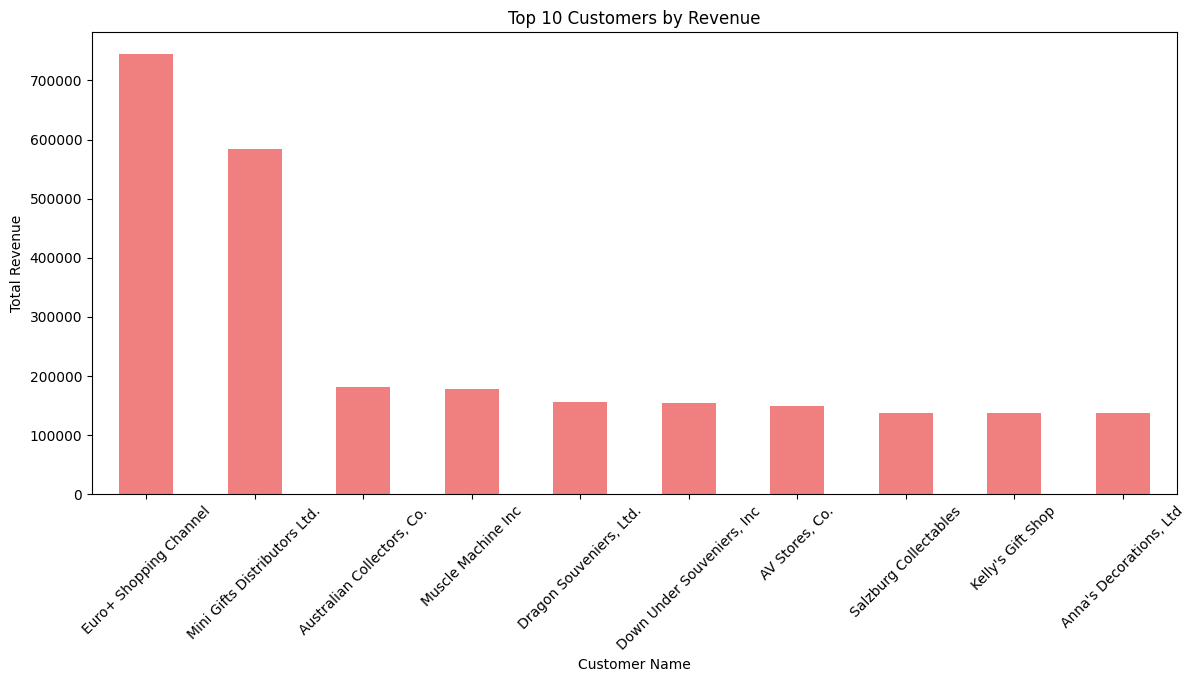

In [365]:
# Bar chart for top customers by revenue
top_customers.plot(kind='bar', figsize=(14, 6), color='lightcoral')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.savefig('Top_top_10_customers.png')
plt.show()


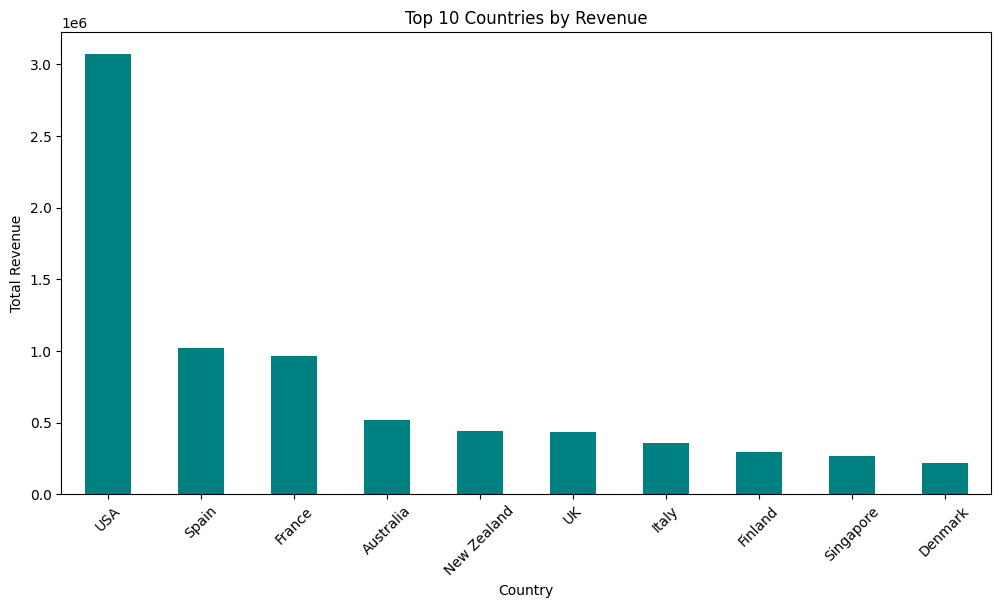

In [366]:
# Bar chart for top countries by revenue
top_countries.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.savefig('Top_10_Countries.png')
plt.show()


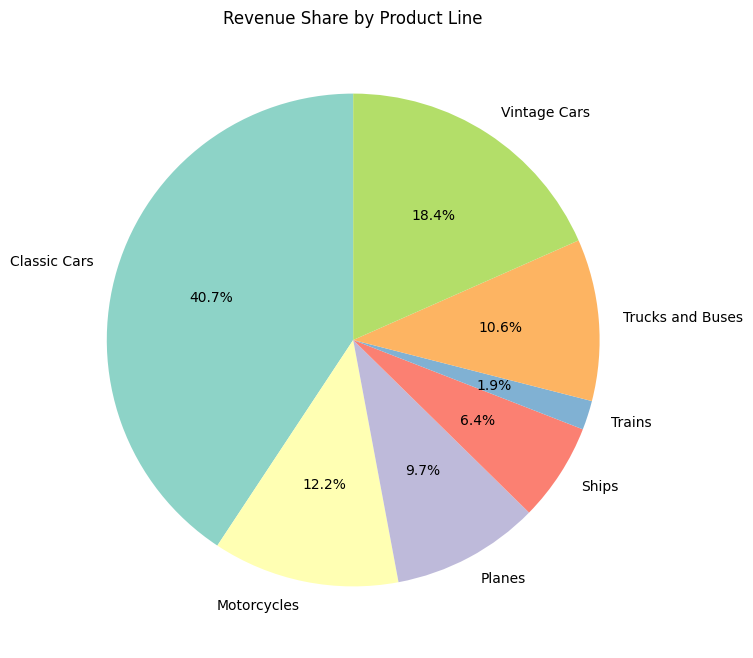

In [367]:
# Calculate total revenue by product line
productline_revenue = analysis_df.groupby('productline')['revenue'].sum()

# Plot a pie chart for revenue share by product line
plt.figure(figsize=(8, 8))
productline_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(productline_revenue)))

# Add title
plt.title('Revenue Share by Product Line')

# Show the plot
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()


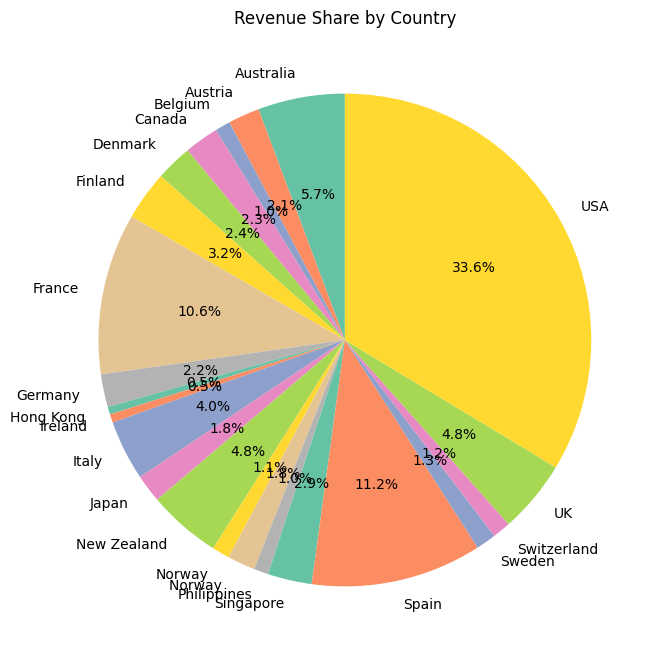

In [368]:
# Calculate total revenue by country
country_revenue = analysis_df.groupby('country')['revenue'].sum()

# Plot a pie chart for revenue share by country
plt.figure(figsize=(8, 8))
country_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(country_revenue)))

# Add title
plt.title('Revenue Share by Country')

# Show the plot
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()


In [369]:
# Calculate RFM metrics
rfm = analysis_df.groupby('customername').agg({
    'orderdate': lambda x: (analysis_df['orderdate'].max() - x.max()).days,  # Recency
    'revenue': 'sum',  # Monetary
    'orderdate': 'count'  # Frequency
}).rename(columns={'orderdate': 'recency', 'revenue': 'monetary', 'orderdate': 'frequency'})

# Normalize RFM scores and apply K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize clusters
print(rfm.head())


                         frequency   monetary  cluster
customername                                          
AV Stores, Co.                  51  148410.09        2
Alpha Cognac                    20   60483.36        3
Amica Models & Co.              26   82223.23        3
Anna's Decorations, Ltd         46  137034.22        2
Atelier graphique                7   22314.36        0


c:\Users\ADMIN\Documents\Paul\School_stuff\4th_year\Business Intelligence 2\Semester Assignment\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Documents\Paul\School_stuff\4th_year\Business Intelligence 2\Semester Assignment\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Documents\Paul\School_stuff\4th_year\Business Intelligence 2\Semester Assignment\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMI

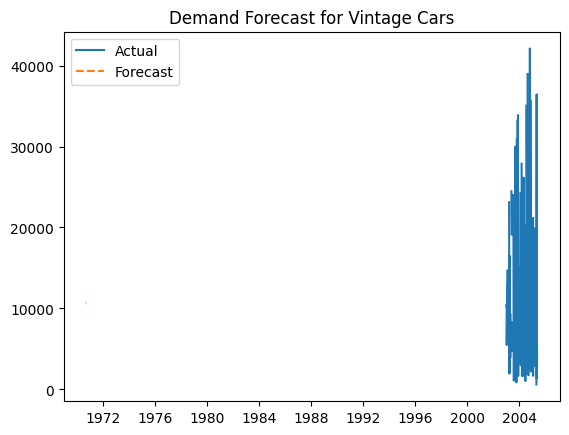

In [370]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Aggregate demand by product line over time
demand = analysis_df.groupby(['orderdate', 'productline'])['revenue'].sum().unstack()

# Fit ARIMA model for a specific product line
product_line = 'Vintage Cars'
demand_series = demand[product_line]
model = ARIMA(demand_series, order=(1, 1, 1))
results = model.fit()

# Forecast future demand
forecast = results.forecast(steps=12)
plt.plot(demand_series, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title(f'Demand Forecast for {product_line}')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18668\2739638193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['orderdate'] = pd.to_datetime(analysis_df['orderdate'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18668\2739638193.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  demand_series = demand_series.resample('M').sum()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18668\2739638193.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(demand_series.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast (2005 - 2006)', linestyle='--', color='red')


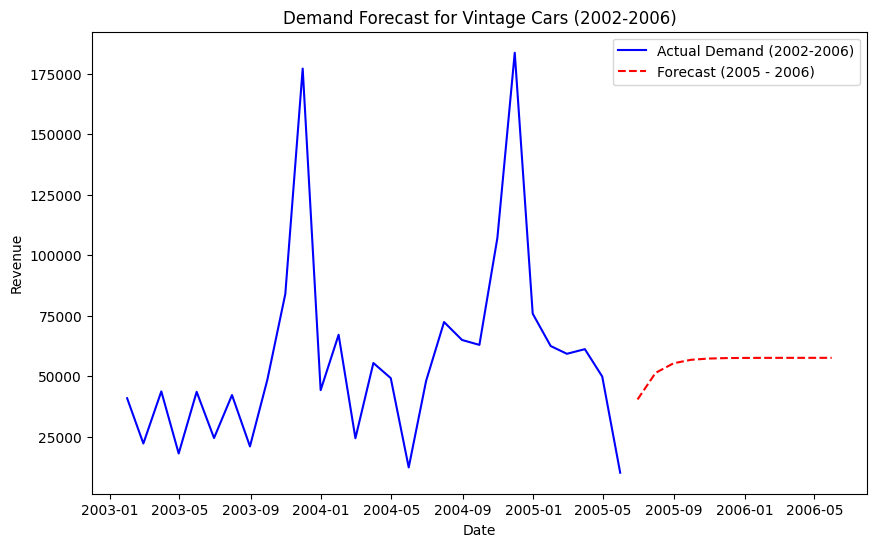

In [371]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'analysis_df' already contains the required 'orderdate', 'productline', and 'revenue' columns.

# Convert orderdate to datetime if it's not already
analysis_df['orderdate'] = pd.to_datetime(analysis_df['orderdate'])

# Filter the data for the years 2002 to 2007
filtered_df = analysis_df[(analysis_df['orderdate'].dt.year >= 2002) & (analysis_df['orderdate'].dt.year <= 2006)]

# Aggregate demand by product line over time
demand = filtered_df.groupby(['orderdate', 'productline'])['revenue'].sum().unstack()

# Fit ARIMA model for a specific product line
product_line = 'Vintage Cars'
demand_series = demand[product_line]

# Resample the data to monthly frequency (if it's not already in monthly format)
demand_series = demand_series.resample('M').sum()

# Fit ARIMA model (order=(1, 1, 1) is an example; you can adjust as needed)
model = ARIMA(demand_series, order=(1, 1, 1))
results = model.fit()

# Forecast future demand (12 months ahead)
forecast = results.forecast(steps=12)

# Plot actual data from 2002 to 2007 and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(demand_series, label='Actual Demand (2002-2006)', color='blue')
plt.plot(pd.date_range(demand_series.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast (2005 - 2006)', linestyle='--', color='red')
plt.legend()
plt.title(f'Demand Forecast for {product_line} (2002-2006)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


In [372]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [373]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sample sentence for testing.")
tokens = [token.text for token in doc]
print(tokens)


['This', 'is', 'a', 'sample', 'sentence', 'for', 'testing', '.']


Topic 1:


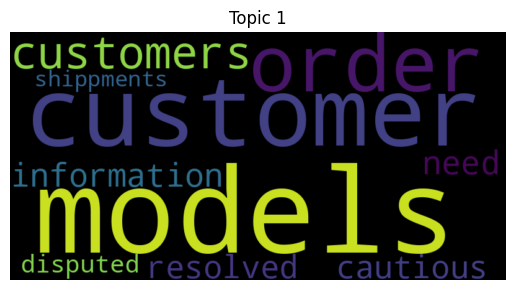

Topic 2:


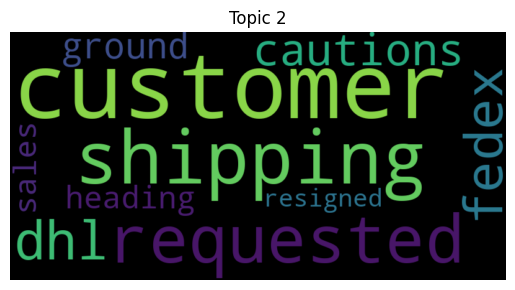

Topic 3:


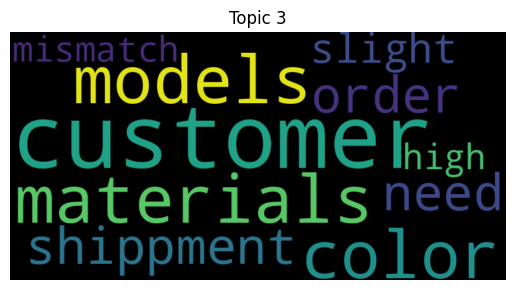

Topic 4:


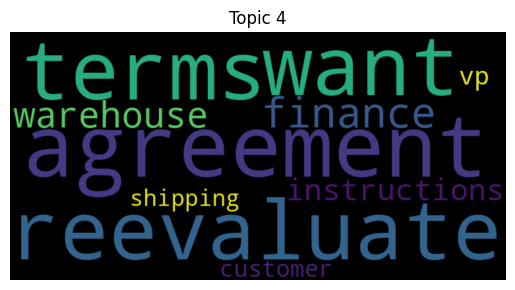

In [374]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Preprocess comments using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]  # Keep alphabetic tokens and remove stopwords
    return ' '.join(tokens)

# Prepare the comments DataFrame
comments_df = orders_df[['comments']].dropna()
comments_df['processed_comments'] = comments_df['comments'].apply(preprocess_text_spacy)

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments_df['processed_comments'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(dtm)

# Visualize topics with word clouds
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    words = {vectorizer.get_feature_names_out()[j]: topic[j] for j in topic.argsort()[-10:]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i+1}")
    plt.show()


In [375]:
print(nlp.pipe_names)  # Should include 'spacytextblob'


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [376]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print(SpacyTextBlob)  # If this works, it's correctly installed.


<class 'spacytextblob.spacytextblob.SpacyTextBlob'>


In [377]:
from textblob import TextBlob
import pandas as pd

# Example DataFrame with comments
data = {'comments': ["I love this product!", "This is terrible, I hate it.", "It's okay, not great.", "Amazing quality!"]}
comments_df = pd.DataFrame(data)

# Analyze sentiment using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and +1 (positive)

comments_df['sentiment_score'] = comments_df['comments'].apply(analyze_sentiment)

# Classify sentiment as Positive, Negative, or Neutral based on polarity
comments_df['sentiment'] = comments_df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.1 else 'Negative' if x < -0.1 else 'Neutral'
)

# View the sentiment classification results
print(comments_df)


                       comments  sentiment_score sentiment
0          I love this product!            0.625  Positive
1  This is terrible, I hate it.           -0.900  Negative
2         It's okay, not great.            0.050   Neutral
3              Amazing quality!            0.750  Positive


Topic 1:


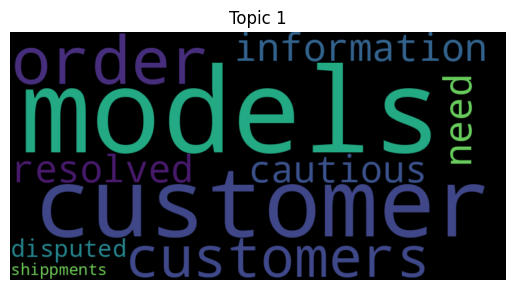

Topic 2:


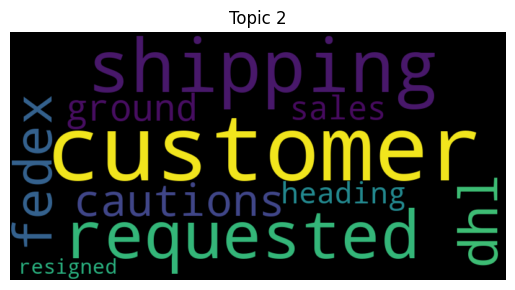

Topic 3:


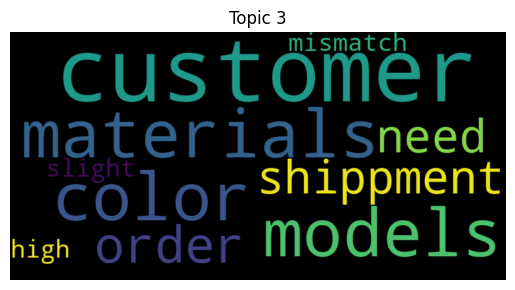

Topic 4:


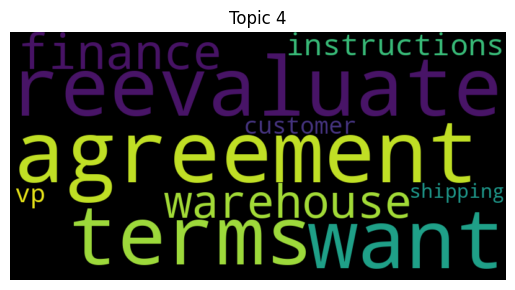

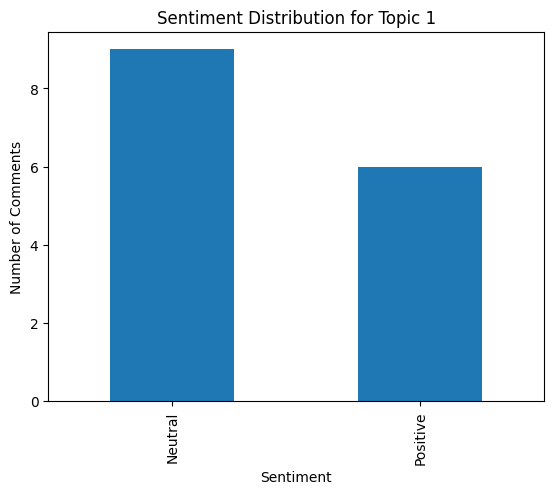

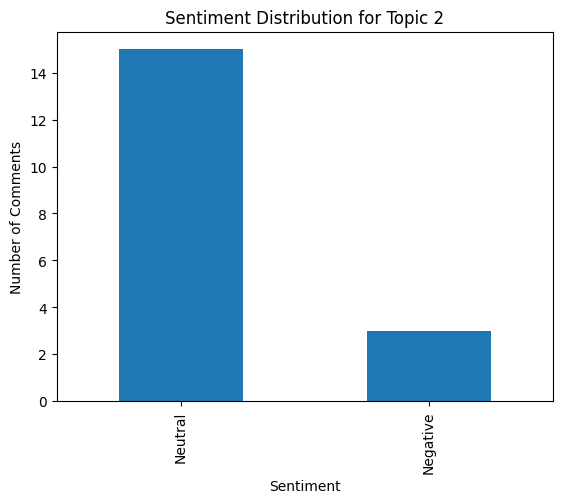

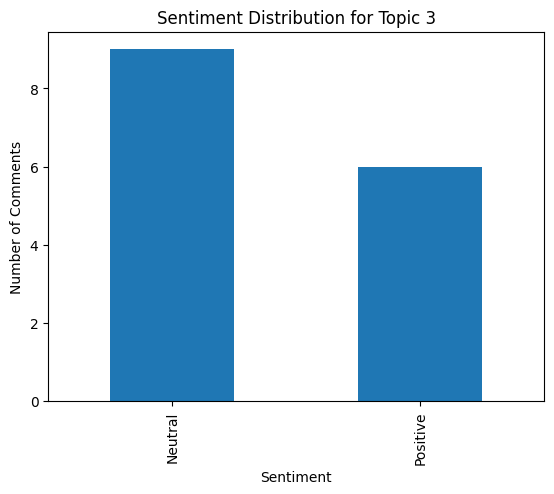

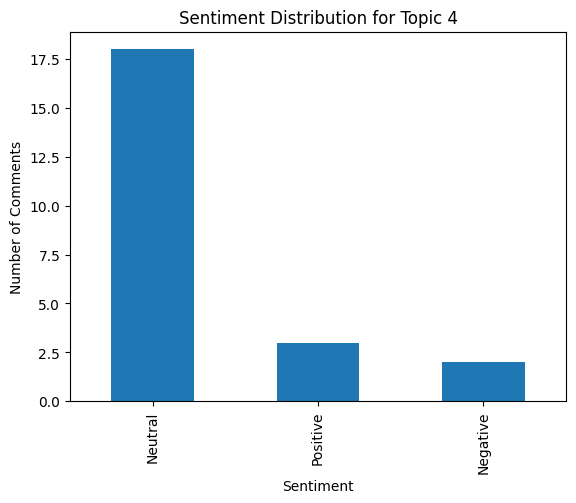

                                             comments  dominant_topic  \
1                              Check on availability.               3   
7   Difficult to negotiate with customer. We need ...               2   
9   Customer requested that FedEx Ground is used f...               1   
12  Customer requested that ad materials (such as ...               2   
18  Customer has worked with some of our vendors i...               1   

   sentiment  sentiment_score  
1    Neutral              0.0  
7    Neutral              0.0  
9    Neutral              0.0  
12   Neutral              0.0  
18   Neutral              0.0  


In [378]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
import pandas as pd

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Preprocess comments using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]  # Keep alphabetic tokens and remove stopwords
    return ' '.join(tokens)

# Analyze sentiment using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and +1 (positive)

# Assuming 'orders_df' is your DataFrame
# Prepare the comments DataFrame
comments_df = orders_df[['comments']].dropna()
comments_df['processed_comments'] = comments_df['comments'].apply(preprocess_text_spacy)

# Apply sentiment analysis to each comment
comments_df['sentiment_score'] = comments_df['comments'].apply(analyze_sentiment)

# Classify sentiment as Positive, Negative, or Neutral based on polarity
comments_df['sentiment'] = comments_df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.1 else 'Negative' if x < -0.1 else 'Neutral'
)

# Create a document-term matrix (DTM)
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments_df['processed_comments'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(dtm)

# Visualize topics with word clouds
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    words = {vectorizer.get_feature_names_out()[j]: topic[j] for j in topic.argsort()[-10:]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i+1}")
    plt.show()

# Optionally: Aggregate sentiment data by topic (topic distribution for each comment)
topic_dist = lda.transform(dtm)  # Get the topic distribution for each comment
comments_df['dominant_topic'] = topic_dist.argmax(axis=1)  # Find the topic with the highest probability for each comment

# Visualize sentiment distribution by topic
for topic_num in range(lda.n_components):
    topic_comments = comments_df[comments_df['dominant_topic'] == topic_num]
    sentiment_counts = topic_comments['sentiment'].value_counts()
    
    # Plot sentiment distribution per topic
    sentiment_counts.plot(kind='bar', title=f'Sentiment Distribution for Topic {topic_num+1}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Comments')
    plt.show()

# Preview the final DataFrame with topic and sentiment
print(comments_df[['comments', 'dominant_topic', 'sentiment', 'sentiment_score']].head())
